## Customer Personality Analysis

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content
Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**
Need to perform clustering to summarize customer segments.

In [46]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import dendrogram

In [2]:
# importing the dataset
df = pd.read_csv('marketing_campaign.csv',sep= '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
# Missing Values
df.isnull().sum()[df.isnull().sum() != 0]

Income    24
dtype: int64

* Only 24 missing values which is around 1% of the dataset, so dropping the rows with missing values.

In [6]:
df = df.dropna()
df.shape

(2216, 29)

In [7]:
# Creating a copy of the data, so that the original data remains intact.
data = df.copy()

In [8]:
# The columns 'Z_CostContact' and 'Z_Revenue' have no variance, also, there is no description provided for these columns,
# hence dropping these.
data.drop(['Z_CostContact','Z_Revenue'], axis = 1, inplace = True)

### Feature Engineering

In [9]:
data['Dt_Customer'] =pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Dt_Customer'].dt.year.unique()

array([2012, 2014, 2013], dtype=int64)

In [10]:
# Age of the customer
data['Age'] = 2014 - data['Year_Birth']   # Since, the last customer enrolled was yr 2014, hence, using it to calculate the age.
data.drop(['Year_Birth'], axis = 1, inplace = True)

In [11]:
# Education
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
data['Education'] = data['Education'].replace({'Basic':'UG', 
                                               'Master':'PG',
                                               'Graduation':'PG', 
                                               '2n Cycle':'PG'})
data['Education'].unique()

array(['PG', 'PhD', 'UG'], dtype=object)

In [13]:
# Marital Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
data['Marital_Status'] = data['Marital_Status'].replace({'Together':'Married',
                                                         'Divorced':'Single',
                                                         'Widow':'Single',
                                                         'Alone':'Single',
                                                         'Absurd':'Single',
                                                         'YOLO':'Single'})
data['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [15]:
# Children
data['Children'] = data['Teenhome'] + data['Kidhome']
data.drop(['Teenhome','Kidhome'], axis = 1, inplace = True)

In [16]:
# Total Spendings in past 2 years
data['Total_Amt_Spend'] = data['MntFishProducts']+data['MntFruits']+data['MntGoldProds']+\
data['MntMeatProducts']+data['MntSweetProducts']+data['MntWines']

In [17]:
# Total Purchases
data['Total_Puchases'] = data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']+data['NumWebPurchases']

In [18]:
# Total Campaigns Accepted
data['Total_Cmp_Accepted'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp3']\
+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

In [19]:
data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'], axis = 1, inplace = True)

In [20]:
data['Total_fam_members'] = data['Marital_Status'].replace({'Married':2, 'Single':1}) + data['Children']

In [21]:
data.drop(['ID','Dt_Customer'], axis = 1, inplace = True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  Complain             2216 non-null   i

### Outliers

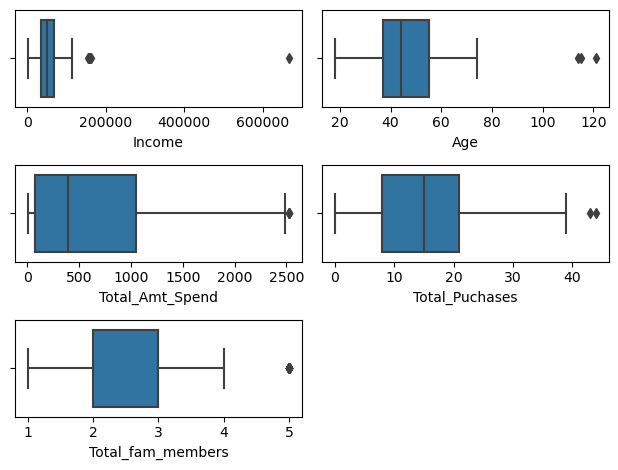

In [23]:
num = ['Income', 'Age', 'Total_Amt_Spend', 'Total_Puchases', 'Total_fam_members']
iterator = 1

for i in num:
    plt.subplot(3,2,iterator)
    sns.boxplot(data[i])
    iterator+=1
plt.tight_layout()
plt.show()

In [24]:
data = data[data['Income'] < 200000]
data = data[data['Age'] < 80]

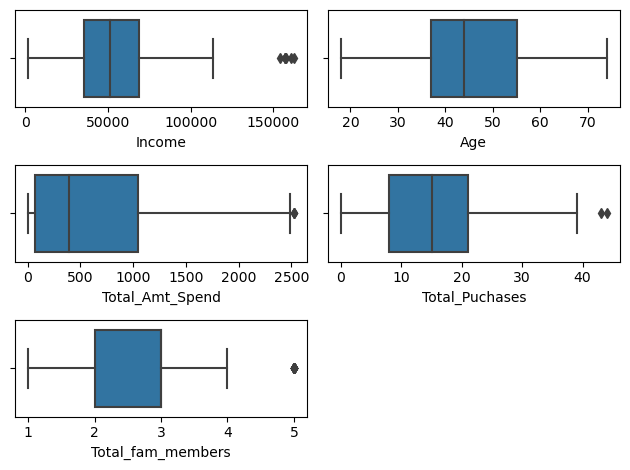

In [25]:
num = ['Income', 'Age', 'Total_Amt_Spend', 'Total_Puchases', 'Total_fam_members']
iterator = 1

for i in num:
    plt.subplot(3,2,iterator)
    sns.boxplot(data[i])
    iterator+=1
plt.tight_layout()
plt.show()

In [26]:
data.shape

(2212, 22)

### Encoding the categorical variables

In [27]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Children,Total_Amt_Spend,Total_Puchases,Total_Cmp_Accepted,Total_fam_members,Education_PhD,Education_UG,Marital_Status_Single
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,57,0,1617,25,1,1,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,60,2,27,6,0,3,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,49,0,776,21,0,2,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,30,1,53,8,0,3,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,33,1,422,19,0,3,1,0,0


### Scaling the data

In [30]:
sc = StandardScaler()
scaled_data = pd.DataFrame(sc.fit_transform(data), columns=data.columns)

In [31]:
scaled_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Children,Total_Amt_Spend,Total_Puchases,Total_Cmp_Accepted,Total_fam_members,Education_PhD,Education_UG,Marital_Status_Single
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.018352,-1.264598,1.676245,1.317945,0.462393,-1.758359,-0.526437,-0.158187,1.349603
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,1.274785,1.404572,-0.963297,-1.159273,-0.506180,0.449070,-0.526437,-0.158187,1.349603
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,0.334530,-1.264598,0.280110,0.796425,-0.506180,-0.654644,-0.526437,-0.158187,-0.740959
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.289547,0.069987,-0.920135,-0.898513,-0.506180,0.449070,-0.526437,-0.158187,-0.740959
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-1.033114,0.069987,-0.307562,0.535666,-0.506180,0.449070,1.899561,-0.158187,-0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.09552,0.163575,0.069987,1.218061,0.405286,-0.506180,0.449070,-0.526437,-0.158187,-0.740959
2208,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.09552,1.958607,2.739158,-0.271040,0.926805,0.462393,2.656499,1.899561,-0.158187,-0.740959
2209,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.09552,-1.033114,-1.264598,1.052052,0.535666,0.462393,-1.758359,-0.526437,-0.158187,1.349603
2210,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.09552,1.103830,0.069987,0.391336,1.057185,-0.506180,0.449070,-0.526437,-0.158187,-0.740959


### PCA

In [33]:
pca = PCA(n_components=10)

In [34]:
pca.fit(scaled_data)

PCA(n_components=10)

In [35]:
pca.explained_variance_

array([8.0894967 , 2.39690839, 1.39094532, 1.33938338, 1.12617305,
       1.01154927, 0.98102148, 0.90894027, 0.84793257, 0.7545422 ])

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.35155824, 0.45572454, 0.51617308, 0.57438082, 0.62332273,
       0.66728325, 0.70991707, 0.74941835, 0.78626832, 0.81905967])

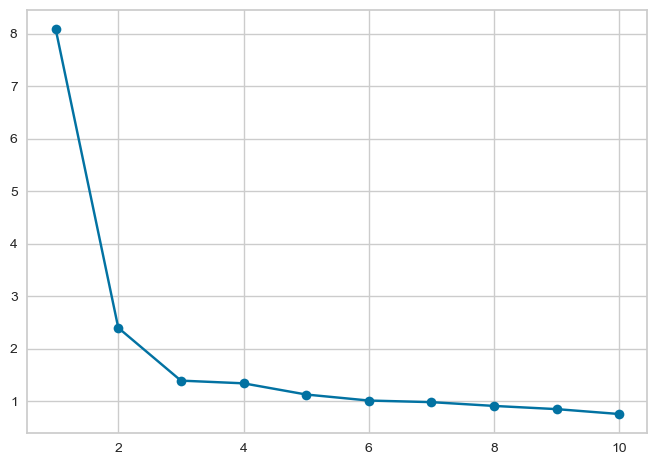

In [38]:
plt.plot(range(1,11),pca.explained_variance_,marker='o')

In [39]:
pca = PCA(n_components=2)

In [41]:
data_pca = pca.fit_transform(scaled_data)

In [42]:
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

In [43]:
data_pca

,PC1,PC2
0,4.726982,-0.551251
1,-2.807281,-0.339917
2,2.084330,-0.166450
3,-2.755511,-0.690476
4,-0.106388,1.220418
...,...,...
2207,2.561279,1.179732
2208,-1.335571,5.203550
2209,2.133340,-1.457003
2210,1.928299,1.092979


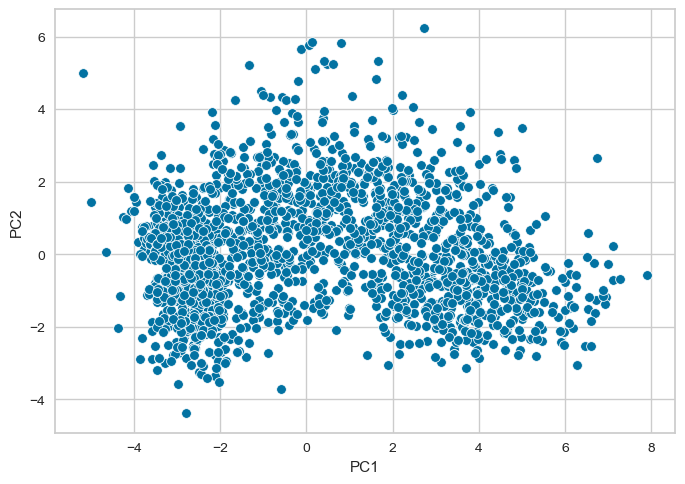

In [44]:
sns.scatterplot(data_pca['PC1'], data_pca['PC2'])
plt.show()

### KMeans Clustering

In [47]:
wcss = []
sil_score = []

for i in range(2,10):
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    pred = model.predict(data_pca)
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(data_pca,pred))

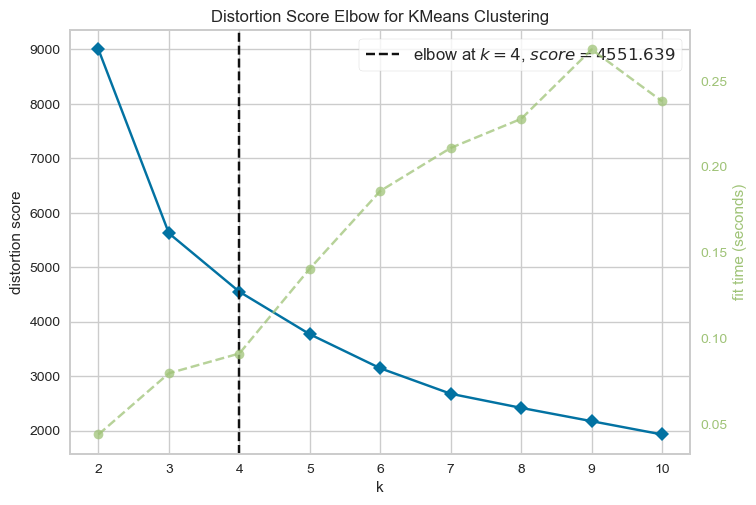

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kelbow = KElbowVisualizer(KMeans(),k = 10)
kelbow.fit(data_pca)
kelbow.show()

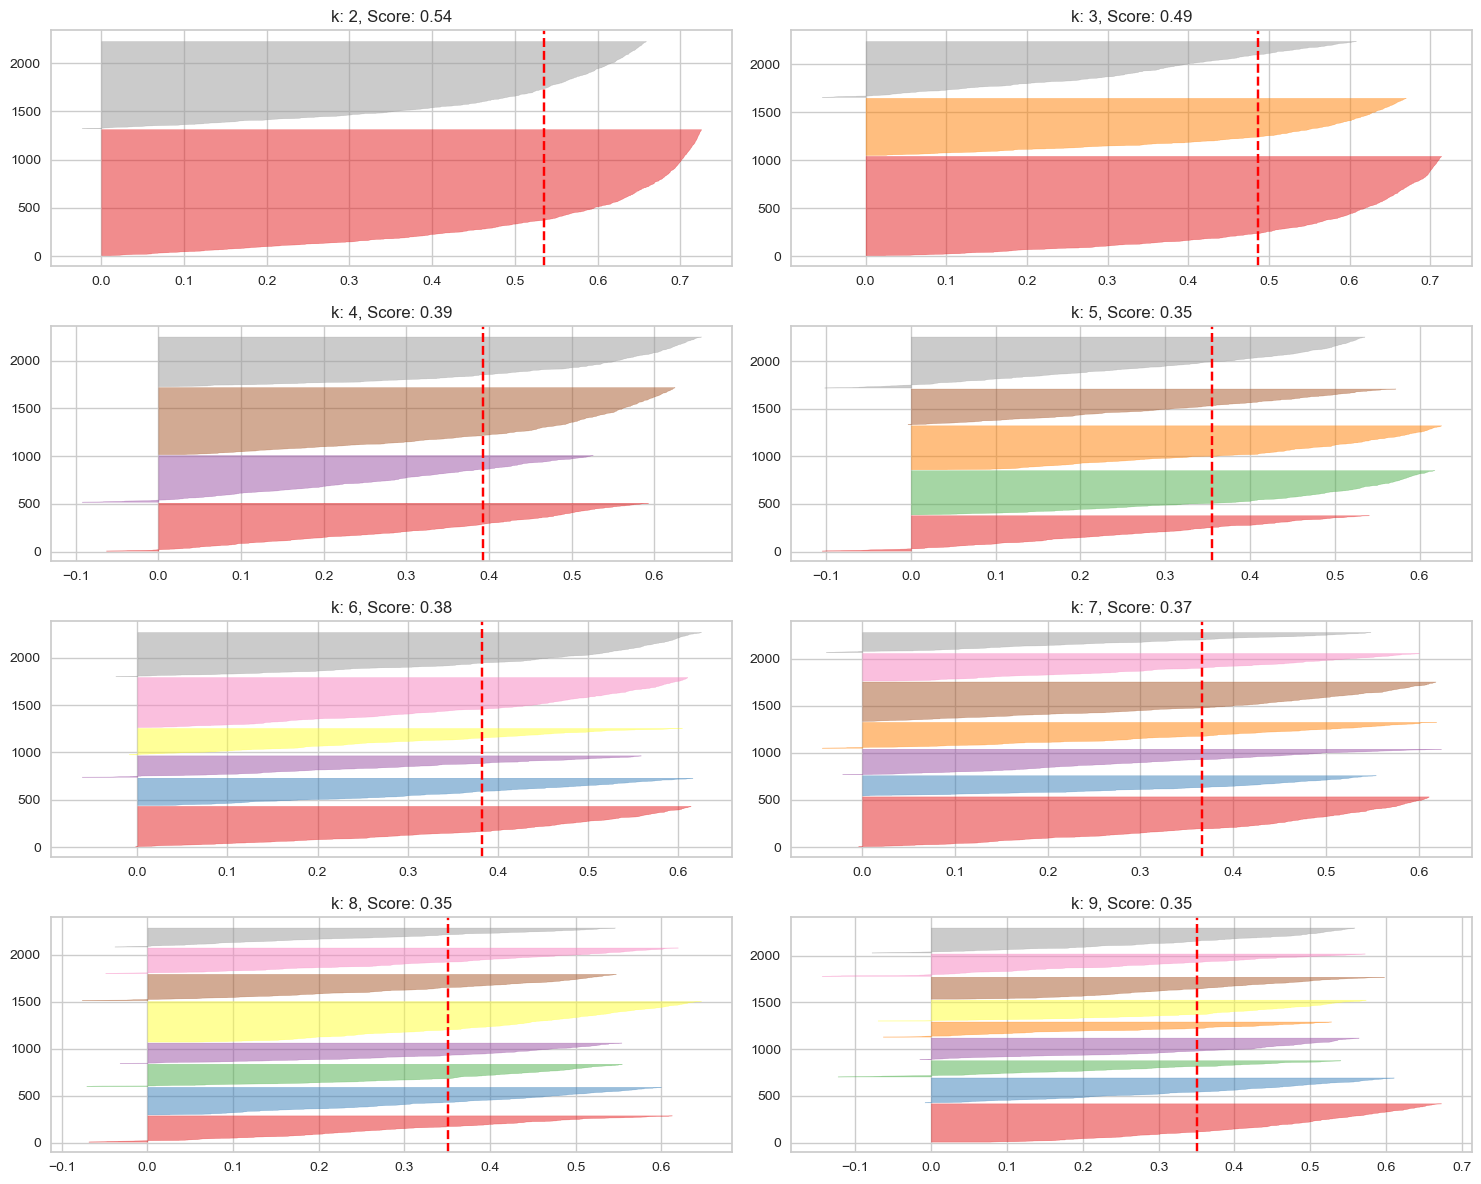

In [49]:
t=1
plt.figure(figsize=(15,12))
for i in range(2,10):
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title('k: %s, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [62]:
kmean = KMeans(n_clusters=4)

In [63]:
kmean.fit(data_pca)

KMeans(n_clusters=4)

In [64]:
y_pred = kmean.predict(data_pca)

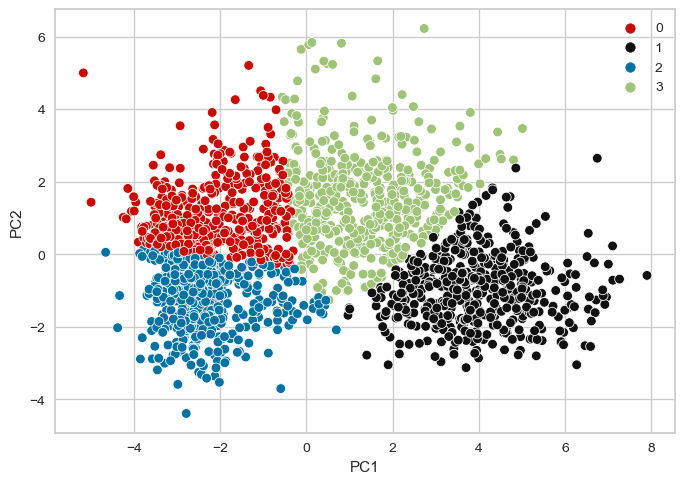

In [66]:
sns.scatterplot(data_pca['PC1'], data_pca['PC2'],
                hue=y_pred, 
                palette=['r','k','b','g'])
plt.show()

In [67]:
data['Label_Kmean'] = y_pred

In [68]:
data['Label_Kmean'].value_counts()

2    697
1    520
3    504
0    491
Name: Label_Kmean, dtype: int64

In [69]:
data.groupby('Label_Kmean').mean()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Children,Total_Amt_Spend,Total_Puchases,Total_Cmp_Accepted,Total_fam_members,Education_PhD,Education_UG,Marital_Status_Single
Label_Kmean,,,,,,,,,,,,,,,,,,,,,,,
0,41918.743381,49.588595,121.507128,5.613035,42.450102,8.270876,5.417515,22.523422,3.448065,3.517312,1.008147,4.160896,6.639511,0.010183,48.004073,1.723014,205.782077,12.134420,0.293279,3.501018,0.260692,0.000000,0.221996
1,76593.696154,49.309615,620.311538,68.250000,470.975000,101.005769,70.792308,78.300000,1.142308,5.073077,6.050000,8.382692,2.711538,0.003846,45.511538,0.121154,1409.634615,20.648077,1.138462,1.690385,0.211538,0.000000,0.430769
2,33423.824964,47.883788,31.546628,5.800574,20.510760,8.631277,5.794835,15.790531,1.530846,1.876614,0.493544,3.134864,6.284075,0.011478,39.955524,0.921090,88.074605,7.035868,0.232425,2.490674,0.143472,0.076040,0.430416
3,61955.670635,49.736111,537.869048,31.650794,177.428571,41.029762,32.373016,68.220238,3.547619,6.686508,3.821429,8.446429,5.398810,0.009921,48.900794,1.081349,888.571429,22.501984,0.511905,2.781746,0.281746,0.001984,0.299603


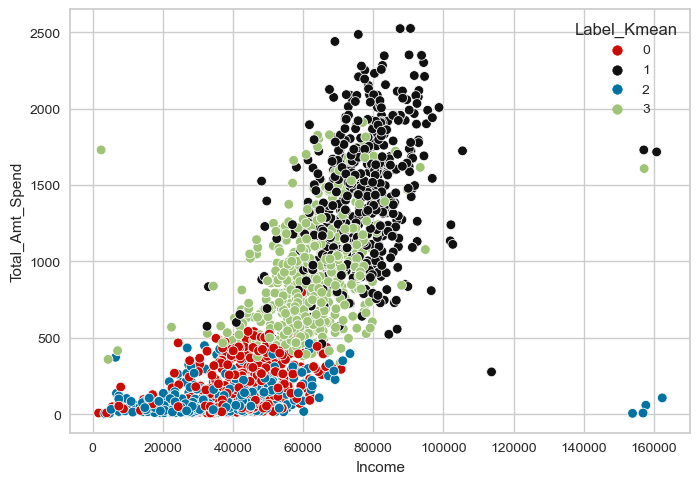

In [70]:
sns.scatterplot(data['Income'], data['Total_Amt_Spend'],
                hue=data['Label_Kmean'], 
                palette=['r','k','b','g'])
plt.show()

**Cluster 0**
* Customer income ranges from 30k to 60k
* Spending less than 500

**Cluster 1**
* Customer income is the highest i.e. 70k to 100k
* The spending are also the highest i.e. 1200 to 2500

**Cluster 2**
* These customers have the lowest income and lowest spendings

**Cluster 3**
* These are middle class people with moderate income of 50k to 70k
* The spending ranges between 500 to 1000.

In [80]:
data.groupby('Label_Kmean')['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Label_Kmean,,,,,,
0,121.507128,5.613035,42.450102,8.270876,5.417515,22.523422
1,620.311538,68.250000,470.975000,101.005769,70.792308,78.300000
2,31.546628,5.800574,20.510760,8.631277,5.794835,15.790531
3,537.869048,31.650794,177.428571,41.029762,32.373016,68.220238


* Customers from Cluster 1 spend significantly higher on non-veg food items and wines followed by middle class people in cluster 3

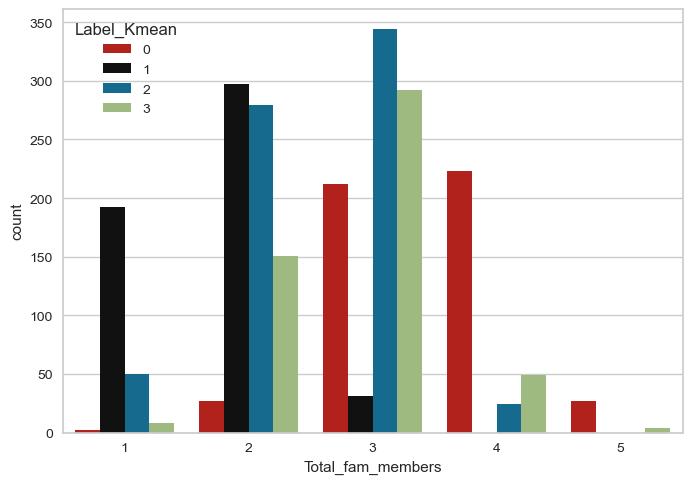

In [79]:
sns.countplot(data['Total_fam_members'], 
              hue = data['Label_Kmean'],
              palette=['r','k','b','g'])
plt.show()

* Customers from cluster 1 i.e. the higest spenders are mostly single or with one dependent.
* Customers who spend less than 500 have more family members.

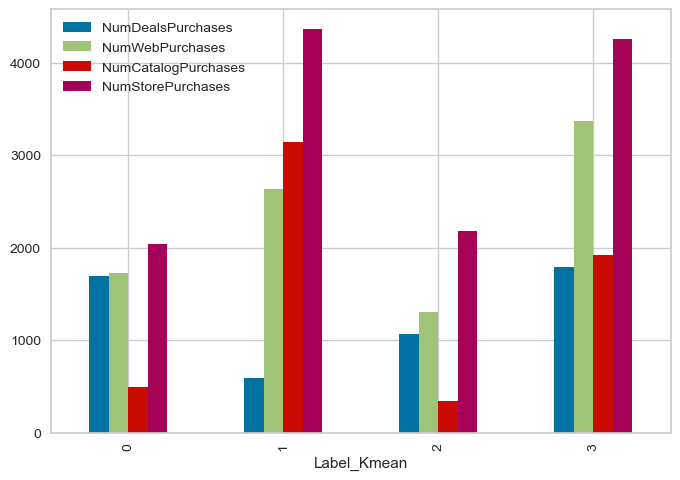

In [85]:
data.groupby('Label_Kmean')['NumDealsPurchases','NumWebPurchases',
                            'NumCatalogPurchases','NumStorePurchases'].sum().plot(kind='bar')
plt.show()

* Cluster 1 with customers spending the highest and cluster 3 with customers spending moderately tend to shop from the stores and catalogues. However, web purchases are higher for customers in cluster 3
* Deal purchases are liked by every customer segment except high class.
* Catalogue purchases are significantly lesser for cluster 0 and cluster 2

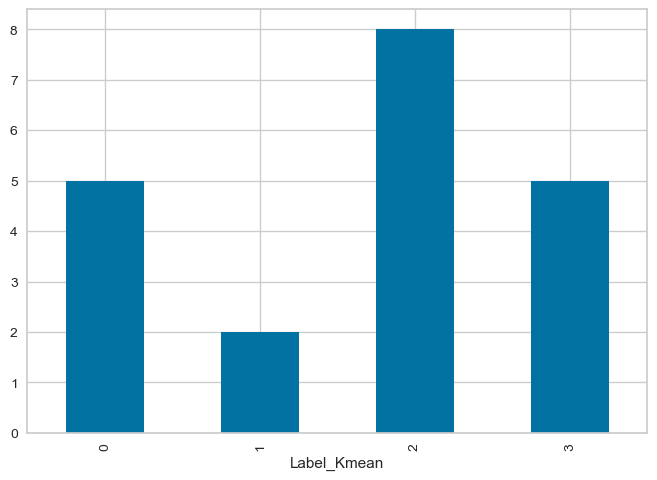

In [89]:
data.groupby(['Label_Kmean'])['Complain'].sum().plot(kind='bar')
plt.show()

* Customers with least spending i.e. Cluster 2 have the highest amount of complaints followed by cluster 0 and 3

### Findings

**CLUSTER 0**
* Low Income, Low Spend
* Generally 3-4 family members
* Prefer store purchases, followed by web and deal purchases
* Tempted by Deals

**CLUSTER 1**
* High Income, High Spend
* Generally single people or with one dependent i.e. spouse or child
* Prefer store purchases, followed by catalogue and web purchases
* Not much tempted by deals

**CLUSTER 2**
* Least Income, Least Spend
* Generally 2-3 family members
* Prefer store purchases, followed by web and deal purchases
* Tempted by Deals

**CLUSTER 3**
* Moderate Income, Moderate Spend
* Generally 3 family members
* Prefer store and web purchases.
* Tempted by Deals